# First try with $b_{b,nw}$

In [2]:
# imports
from importlib import reload

import seaborn as sns
from matplotlib import pyplot as plt

from ocpy.hydrolight import loisel23
from ocpy.utils import plotting

from bing import rt

from xiop import geometric as xiop_geom
from xiop import inversion

In [3]:
%matplotlib ipympl

# Load up Loisel+2023

In [4]:
l23_ds = loisel23.load_ds(1,0)

## Unpack

In [5]:
l23_wave = l23_ds.Lambda.data
l23_Rrs = l23_ds.Rrs.data
l23_bbnw = l23_ds.bbnw.data

# Water

## Use Loisel+2023 (to be consistent)

In [6]:
aw = (l23_ds.a.data - l23_ds.anw.data)[0]
aw.shape

(81,)

In [7]:
bbw = (l23_ds.bb.data - l23_ds.bbnw.data)[0]

# Try one

In [8]:
idx = 170

In [9]:
Rrs = l23_Rrs[idx]
bbnw_true = l23_bbnw[idx]

## $r_{\rm rs}$

In [10]:
rrs = xiop_geom.rrs_from_Rrs(Rrs)

## Plot

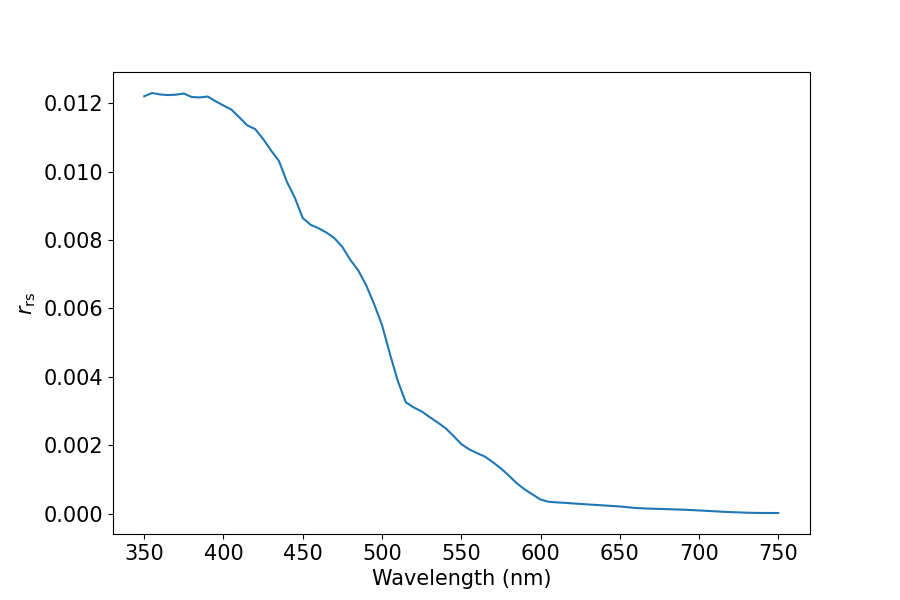

In [11]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, rrs)
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$r_{\rm rs}$')
#
plotting.set_fontsize(ax, 15)
#
plt.show()

## Hansen Coefficients 

In [13]:
reload(inversion)
dataset = 'loisel23'
extras = dict(X=1, Y=0)
H1, H2 = inversion.calc_Hcoeff(l23_wave, dataset, extras)

## $D$

In [14]:
D = inversion.quadratic(rrs, H1, H2)

### Plot

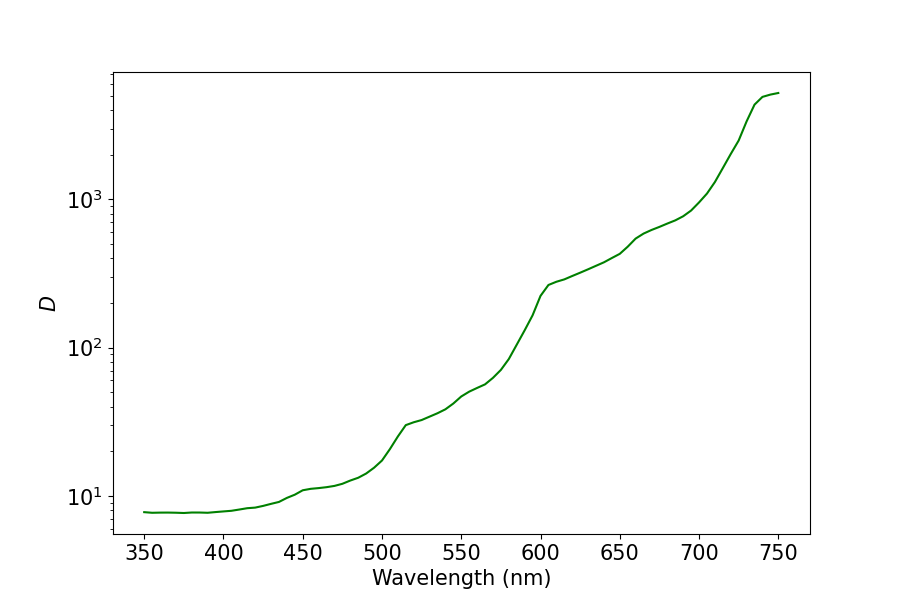

In [15]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, D, 'g')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$D$')
#
ax.set_yscale('log')
#
plotting.set_fontsize(ax, 15)
#
plt.show()

## Invert

In [16]:
reload(inversion)
bbnw = inversion.retrieve_bbnw(aw, bbw, D)

### Here we go...

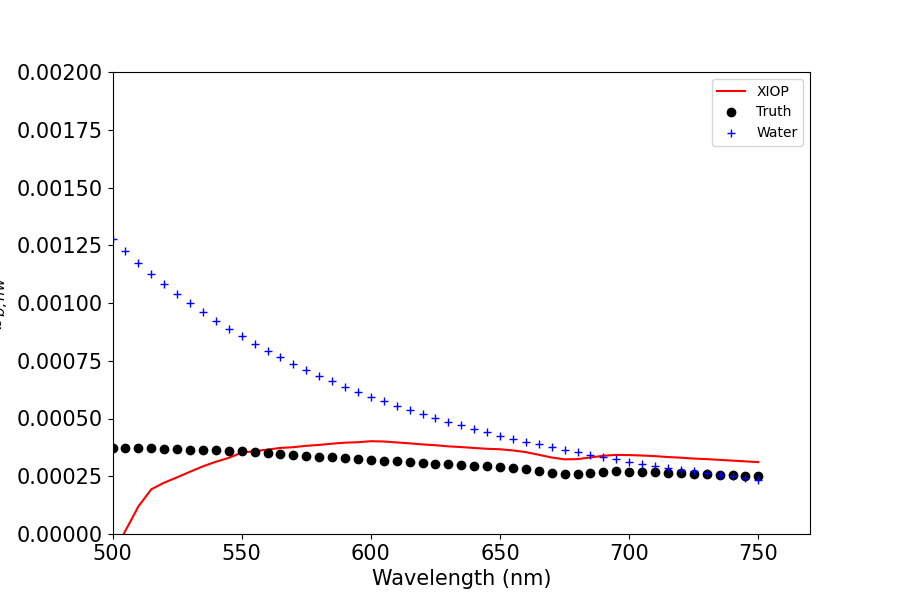

In [17]:
scl = 1.
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, bbnw/scl, 'r-', label='XIOP')
ax.plot(l23_wave, l23_bbnw[idx], 'ko', label='Truth')
ax.plot(l23_wave, bbw, 'b+', label='Water')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$b_{b,nw}$')
#
#ax.set_yscale('log')
ax.set_ylim(0., 0.002)
ax.set_xlim(500., None)
#
plotting.set_fontsize(ax, 15)
ax.legend()
#
plt.show()

----

# Internal test

In [18]:
Rrs = rt.calc_Rrs(l23_ds.a.data[idx], l23_ds.bb.data[idx])

In [19]:
rrs = xiop_geom.rrs_from_Rrs(Rrs)

In [20]:
reload(inversion)
D = inversion.quadratic(rrs, rt.G1, rt.G2)

In [21]:
bbnw = inversion.retrieve_bbnw(aw, bbw, D)

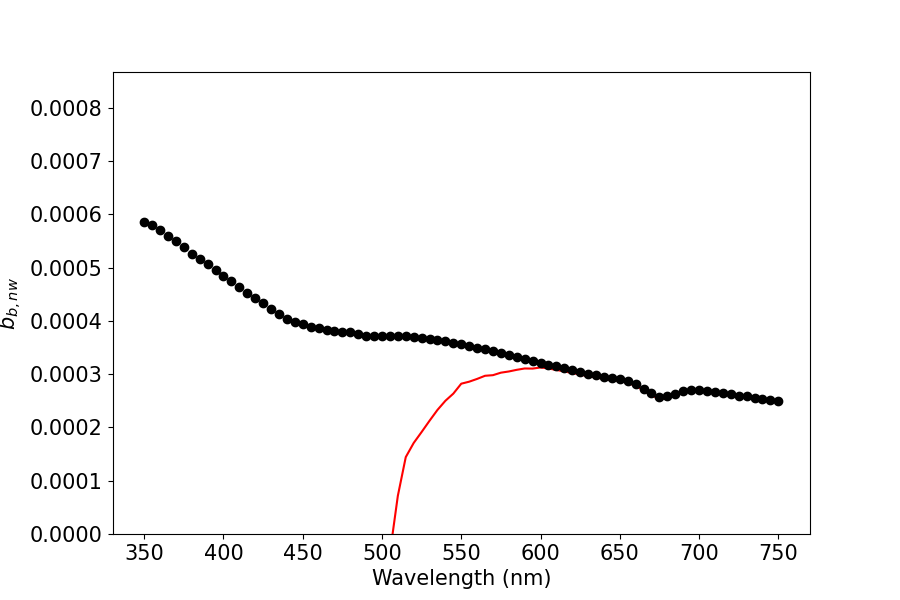

In [22]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, bbnw, 'r-', label='XIOP')
ax.plot(l23_wave, l23_bbnw[idx], 'ko', label='Truth')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$b_{b,nw}$')
#
#ax.set_yscale('log')
ax.set_ylim(0., None)
#
plotting.set_fontsize(ax, 15)
#
plt.show()